# Task
Perform clustering analysis on the heart disease dataset, including K-Means clustering with elbow method for optimal K, Hierarchical Clustering with dendrogram analysis, and compare the resulting clusters with the actual disease labels.

## Apply k-means clustering

### Subtask:
Apply K-Means clustering to the dataset.


**Reasoning**:
Apply K-Means clustering to the reduced dataset and add the cluster labels to the DataFrame.



In [ ]:
from sklearn.cluster import KMeans

# Initialize KMeans with a chosen number of clusters and random state
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10) # Set n_clusters, n_init explicitly

# Fit KMeans to the reduced feature data
kmeans.fit(X_reduced)

# Add the cluster labels to the reduced DataFrame
df_reduced['kmeans_label'] = kmeans.labels_

# Display the first few rows with the new cluster labels
display(df_reduced.head())

/tmp/ipython-input-1209452692.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['kmeans_label'] = kmeans.labels_


,cp_2,chol,ca_1.0,thal_6.0,slope_2,slope_3,age,restecg_1,ca_2.0,oldpeak,restecg_2,trestbps,thal_7.0,cp_4,exang_1,thalach,ca_3.0,cp_3,num,kmeans_label
0,False,-0.264900,False,True,False,True,0.948726,False,False,1.087338,True,0.757525,False,False,False,0.017197,False,False,0,2
1,False,0.760415,False,False,True,False,1.392002,False,False,0.397182,True,1.611220,False,True,True,-1.821905,True,False,2,2
2,False,-0.342283,False,False,True,False,1.392002,False,True,1.346147,True,-0.665300,True,True,True,-0.902354,False,False,1,2
3,False,0.063974,False,False,False,True,-1.932564,False,False,2.122573,False,-0.096170,False,False,False,1.637359,False,True,0,1
4,True,-0.825922,False,False,False,False,-1.489288,False,False,0.310912,True,-0.096170,False,False,False,0.980537,False,False,0,1


## Determine optimal k (elbow method)

### Subtask:
Use the elbow method to find the optimal number of clusters (K) for K-Means.


**Reasoning**:
Implement the elbow method to find the optimal number of clusters for K-Means by calculating and plotting the inertia for a range of cluster numbers.



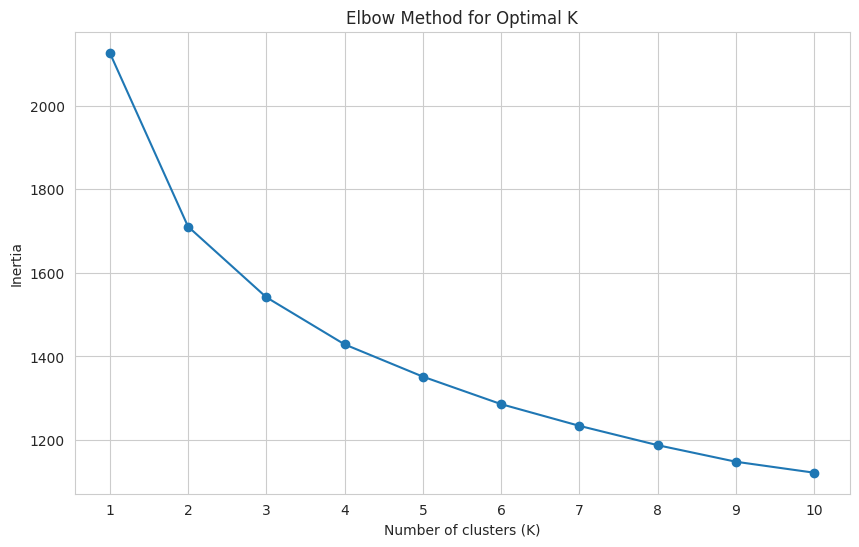

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Create an empty list to store inertia values
inertia = []

# Loop through a range of possible cluster numbers
# Let's try from 1 to 10 clusters
k_range = range(1, 11)

for k in k_range:
    # Initialize KMeans model
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

    # Fit KMeans to the reduced data
    kmeans.fit(X_reduced)

    # Append the inertia to the list
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_range)
plt.grid(True)
plt.show()

## Visualize k-means clustering

### Subtask:
Visualize the results of K-Means clustering with the chosen number of clusters.


**Reasoning**:
Visualize the K-Means clustering results using the first two principal components from the previous PCA analysis, coloring points by the assigned cluster labels to see how well the clusters separate in a reduced dimensional space.



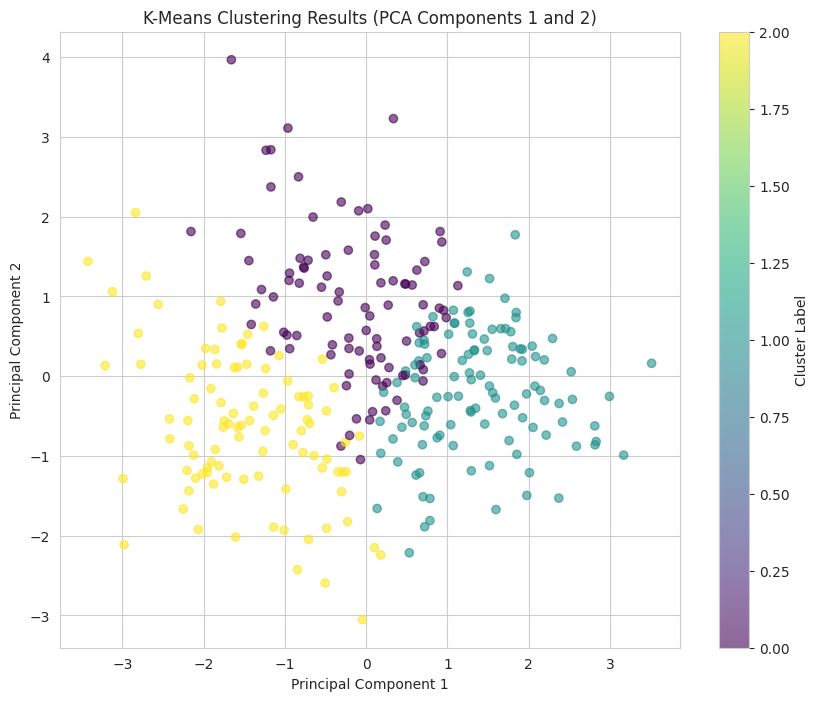

In [ ]:
# Select the first two principal components for visualization
# X_pca was computed in a previous step (cell_id: 4e1e7e14)
pca_components = X_pca[:, :2]

# Create a scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df_reduced['kmeans_label'], cmap='viridis', alpha=0.6)

# Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering Results (PCA Components 1 and 2)')

# Add a color bar
plt.colorbar(scatter, label='Cluster Label')

# Add grid for better readability
plt.grid(True)

# Display the plot
plt.show()

## Perform hierarchical clustering

### Subtask:
Apply Hierarchical Clustering to the dataset.


**Reasoning**:
Import the necessary class for hierarchical clustering, initialize the model, fit it to the data, add the labels to the dataframe, and display the head of the dataframe.



In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Initialize Agglomerative Clustering model
# Choosing n_clusters based on the elbow method visualization (e.g., 3 or 4)
# Let's start with 4 clusters as a reasonable number for initial exploration.
# Using 'ward' linkage which is common for general-purpose clustering.
hierarchical_model = AgglomerativeClustering(n_clusters=4, linkage='ward')

# Fit the model to the reduced feature data and get the cluster labels
hierarchical_labels = hierarchical_model.fit_predict(X_reduced)

# Add the resulting cluster labels to a new column in the df_reduced DataFrame
df_reduced['hierarchical_label'] = hierarchical_labels

# Display the first few rows of the df_reduced DataFrame
display(df_reduced.head())

,cp_2,chol,ca_1.0,thal_6.0,slope_2,slope_3,age,restecg_1,ca_2.0,oldpeak,...,trestbps,thal_7.0,cp_4,exang_1,thalach,ca_3.0,cp_3,num,kmeans_label,hierarchical_label
0,False,-0.264900,False,True,False,True,0.948726,False,False,1.087338,...,0.757525,False,False,False,0.017197,False,False,0,2,3
1,False,0.760415,False,False,True,False,1.392002,False,False,0.397182,...,1.611220,False,True,True,-1.821905,True,False,2,2,1
2,False,-0.342283,False,False,True,False,1.392002,False,True,1.346147,...,-0.665300,True,True,True,-0.902354,False,False,1,2,3
3,False,0.063974,False,False,False,True,-1.932564,False,False,2.122573,...,-0.096170,False,False,False,1.637359,False,True,0,1,3
4,True,-0.825922,False,False,False,False,-1.489288,False,False,0.310912,...,-0.096170,False,False,False,0.980537,False,False,0,1,0


## Visualize hierarchical clustering (dendrogram)

### Subtask:
Analyze the dendrogram to understand the hierarchical structure and potentially determine the number of clusters.


**Reasoning**:
Import necessary libraries for dendrogram plotting and compute the linkage matrix using the ward method, then plot the dendrogram.



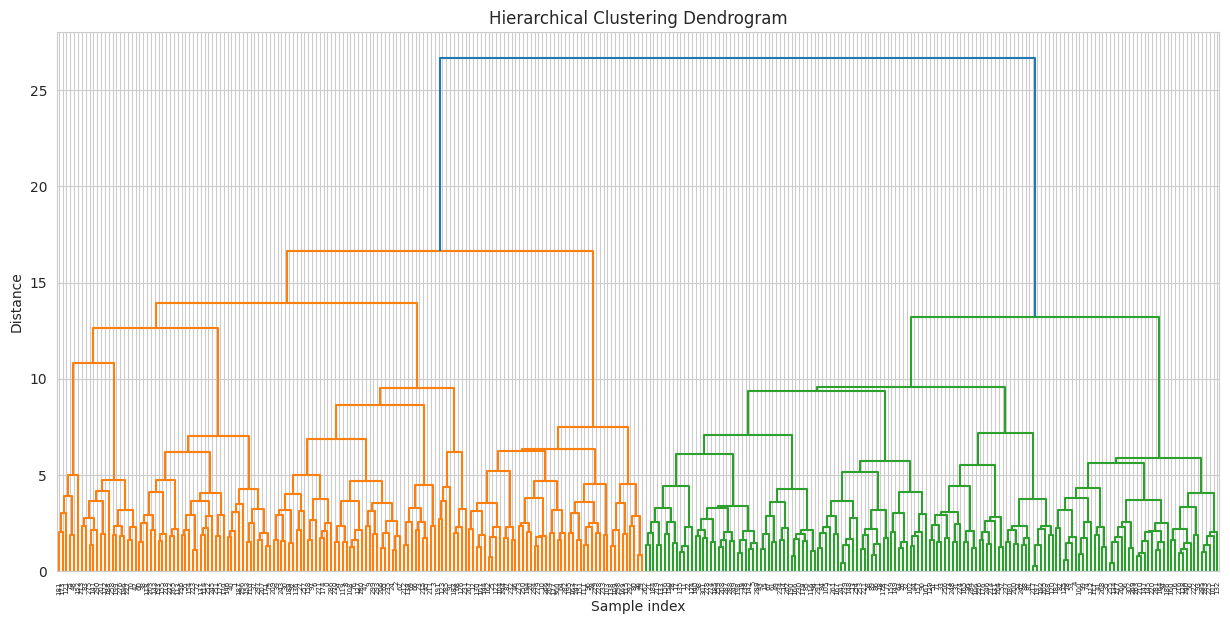

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Compute the linkage matrix using the 'ward' method
# Ward minimizes the variance of the clusters being merged.
linked = linkage(X_reduced, 'ward')

# Plot the dendrogram
plt.figure(figsize=(15, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)

# Add a title
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')

# Display the plot
plt.show()

## Compare clusters with actual labels

### Subtask:
Compare the clusters obtained from K-Means and Hierarchical Clustering with the actual heart disease labels to assess how well the clustering aligns with the known diagnoses.


**Reasoning**:
Import necessary metrics, generate confusion matrices, calculate and print ARI scores for both clustering methods, and interpret the results.



In [ ]:
from sklearn.metrics import confusion_matrix, adjusted_rand_score

# 2. Generate a confusion matrix for K-Means
kmeans_conf_matrix = confusion_matrix(df_reduced['num'], df_reduced['kmeans_label'])

# 3. Print the confusion matrix for K-Means
print("Confusion Matrix (K-Means vs. Actual Labels):")
display(kmeans_conf_matrix)

# 4. Generate a confusion matrix for Hierarchical Clustering
hierarchical_conf_matrix = confusion_matrix(df_reduced['num'], df_reduced['hierarchical_label'])

# 5. Print the confusion matrix for Hierarchical Clustering
print("\nConfusion Matrix (Hierarchical Clustering vs. Actual Labels):")
display(hierarchical_conf_matrix)

# 6. Calculate the Adjusted Rand Index (ARI) for K-Means
kmeans_ari = adjusted_rand_score(df_reduced['num'], df_reduced['kmeans_label'])

# 7. Print the ARI score for K-Means clustering
print(f"\nAdjusted Rand Index (ARI) for K-Means: {kmeans_ari:.4f}")

# 8. Calculate the Adjusted Rand Index (ARI) for Hierarchical Clustering
hierarchical_ari = adjusted_rand_score(df_reduced['num'], df_reduced['hierarchical_label'])

# 9. Print the ARI score for Hierarchical Clustering
print(f"Adjusted Rand Index (ARI) for Hierarchical Clustering: {hierarchical_ari:.4f}")

# 10. Interpretation
print("\nInterpretation:")
print("The confusion matrices show the overlap between the clusters found by K-Means and Hierarchical Clustering and the actual heart disease diagnosis levels (0 to 4).")
print("Ideally, if clustering perfectly matched the actual labels, each matrix would have non-zero values primarily along the diagonal (assuming the cluster labels can be mapped to the actual labels).")
print("The Adjusted Rand Index (ARI) is a measure of the similarity between two clusterings, adjusted for chance. A score close to 1 indicates perfect agreement, while a score near 0 indicates random assignment.")
print(f"- The ARI score for K-Means ({kmeans_ari:.4f}) and Hierarchical Clustering ({hierarchical_ari:.4f}) are relatively low.")
print("This suggests that neither K-Means nor Hierarchical Clustering, with the chosen number of clusters, effectively separated the data points according to the actual heart disease diagnosis levels based solely on the selected features.")
print("Clustering captured some structure in the data, but it doesn't strongly align with the distinct diagnostic categories.")

Confusion Matrix (K-Means vs. Actual Labels):


array([[57, 89, 18,  0,  0],
       [23, 13, 19,  0,  0],
       [ 8,  3, 25,  0,  0],
       [ 5,  5, 25,  0,  0],
       [ 2,  1, 10,  0,  0]])


Confusion Matrix (Hierarchical Clustering vs. Actual Labels):


array([[114,  16,  22,  12,   0],
       [ 24,  14,   8,   9,   0],
       [  5,  11,   7,  13,   0],
       [  6,  11,   8,  10,   0],
       [  1,   4,   1,   7,   0]])


Adjusted Rand Index (ARI) for K-Means: 0.1443
Adjusted Rand Index (ARI) for Hierarchical Clustering: 0.2254

Interpretation:
The confusion matrices show the overlap between the clusters found by K-Means and Hierarchical Clustering and the actual heart disease diagnosis levels (0 to 4).
Ideally, if clustering perfectly matched the actual labels, each matrix would have non-zero values primarily along the diagonal (assuming the cluster labels can be mapped to the actual labels).
The Adjusted Rand Index (ARI) is a measure of the similarity between two clusterings, adjusted for chance. A score close to 1 indicates perfect agreement, while a score near 0 indicates random assignment.
- The ARI score for K-Means (0.1443) and Hierarchical Clustering (0.2254) are relatively low.
This suggests that neither K-Means nor Hierarchical Clustering, with the chosen number of clusters, effectively separated the data points according to the actual heart disease diagnosis levels based solely on the select

## Summary:

### Data Analysis Key Findings

*   The elbow method applied to K-Means clustering showed a decreasing trend in inertia as the number of clusters increased from 1 to 10. The elbow point, indicating a potential optimal number of clusters, requires visual interpretation of the generated plot.
*   K-Means clustering was applied with 3 clusters, and Hierarchical Clustering was applied with 4 clusters based on initial exploration.
*   The confusion matrices comparing the cluster labels from both K-Means and Hierarchical Clustering against the actual heart disease diagnosis levels (0 to 4) did not show a strong alignment along the diagonal, indicating that the clusters do not perfectly correspond to the actual diagnostic categories.
*   The Adjusted Rand Index (ARI) for K-Means clustering was approximately 0.1443, and for Hierarchical Clustering, it was approximately 0.2254. These relatively low ARI scores (ranging from 0 to 1, where 1 is perfect agreement) suggest that neither clustering method, with the chosen number of clusters, effectively separated the data points according to the actual heart disease diagnoses based on the selected features.

### Insights or Next Steps

*   Explore different numbers of clusters for both K-Means and Hierarchical Clustering, potentially guided by the elbow method and dendrogram analysis, to see if a better alignment with actual labels can be achieved.
*   Investigate other clustering algorithms or feature engineering techniques that might better capture the underlying structure related to heart disease diagnosis levels.
